<a href="https://colab.research.google.com/github/alinelimeira/ML_treino_alura/blob/main/introducaomachinelearning_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install seaborn==0.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


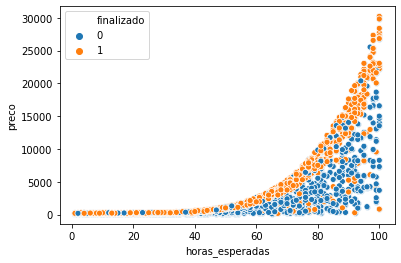

In [2]:
import pandas as pd


import seaborn as sns

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
dados = dados.rename(columns = a_renomear)
dados.head()


troca = {
    0 : 1,
    1 : 0
}
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()


sns.scatterplot(x="horas_esperadas", y="preco", data=dados)

sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)







In [13]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC #Linear Support Vector Classification
from sklearn.metrics import accuracy_score

x= dados [['horas_esperadas', 'preco']]
y = dados ['finalizado']

SEED = 5
treino_x, teste_x, treino_y, teste_y = train_test_split (x,y,
                                                        random_state = SEED, test_size = 0.25,
                                                        stratify = y
                                                        )

print("treinaremos com %d elementos e testaremos com %d elementos" %(len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)*100
print("a acuracia foi %.2f%%" % acuracia)


treinaremos com 1617 elementos e testaremos com 540 elementos
a acuracia foi 52.59%


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [4]:
import numpy as np
previsoes_de_base = np.ones(540)

acuracia = accuracy_score(teste_y, previsoes_de_base )*100
print("a acuracia do algoritmo de baseline foi %.2f%%" % acuracia)


a acuracia do algoritmo de baseline foi 52.59%


Analisar cada uma das classificações 

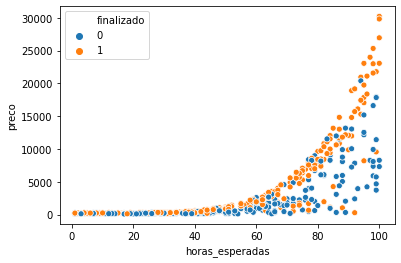

In [5]:
sns.scatterplot(x="horas_esperadas", y = "preco", hue = teste_y, data=teste_x) #hue é a cor

Otimizar o gráfico, determinando por pixel qual ponto é finalizado ou não, mudando pela cor

In [6]:
x_min =teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()

y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max, y_min, y_max)

1 100 100 30223


In [7]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels) # pixels do eixo x
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels) 

In [8]:
xx, yy = np.meshgrid(eixo_x, eixo_y) #mesclar os dois eixos  
pontos = np.c_[xx.ravel(), yy.ravel()] #concatena os pontos nos eixos,formando coordenadas 
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [9]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape) #redimensiona de acordo com o shape de x e y
Z

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

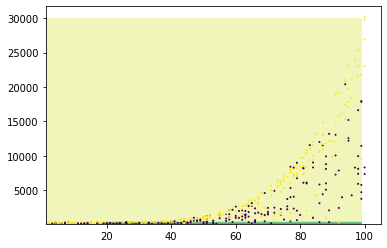

In [10]:
import matplotlib.pyplot as plt #para plotar o grafico

plt.contourf(xx, yy, Z, alpha = 0.3 ) #alpha deixa o a cor mais clara, em z
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1) #c determina a cor, s determina o size

#DECISION BOUNDARY

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC #Support Vector Classification
from sklearn.metrics import accuracy_score

x= dados [['horas_esperadas', 'preco']]
y = dados ['finalizado']

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split (x,y,
                                                        random_state = SEED, test_size = 0.25,
                                                        stratify = y
                                                        )

print("treinaremos com %d elementos e testaremos com %d elementos" %(len(treino_x), len(teste_x)))

modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)*100
print("a acuracia foi %.2f%%" % acuracia)

treinaremos com 1617 elementos e testaremos com 540 elementos
a acuracia foi 59.07%


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


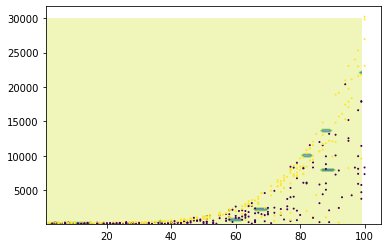

In [15]:
x_min =teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()

y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels) # pixels do eixo x
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y) #mesclar os dois eixos  
pontos = np.c_[xx.ravel(), yy.ravel()] #concatena os pontos nos eixos,formando coordenadas 
pontos

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape) #redimensiona de acordo com o shape de x e y


import matplotlib.pyplot as plt #para plotar o grafico

plt.contourf(xx, yy, Z, alpha = 0.3 ) #alpha deixa o a cor mais clara, em z
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1) #c determina a cor, s determina o size


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

x= dados [['horas_esperadas', 'preco']]
y = dados ['finalizado']

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split (x,y,
                                                        random_state = SEED, test_size = 0.25,
                                                        stratify = y
                                                        )

print("treinaremos com %d elementos e testaremos com %d elementos" %(len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x) #cria uma escala nova em relacao ao treino x
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)*100
print("a acuracia foi %.2f%%" % acuracia)

treinaremos com 1617 elementos e testaremos com 540 elementos
a acuracia foi 66.85%


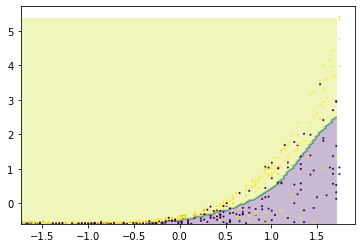

In [19]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]


x_min = data_x.min()
x_max = data_x.max()

y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels) # pixels do eixo x
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y) #mesclar os dois eixos  
pontos = np.c_[xx.ravel(), yy.ravel()] #concatena os pontos nos eixos,formando coordenadas 
pontos

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape) #redimensiona de acordo com o shape de x e y


import matplotlib.pyplot as plt #para plotar o grafico

plt.contourf(xx, yy, Z, alpha = 0.3 ) #alpha deixa o a cor mais clara, em z
plt.scatter(data_x, data_y, c=teste_y, s=1) #c determina a cor, s determina o size

#DECISION BOUNDARY